In [1]:
#import intial packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:/Users/Jo's/Downloads/Sem4/glass-classification/glass.csv")
print("shape of data",data.shape)
data.head()

shape of data (214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Describe Data

In [3]:
# checking the number of types
data.Type.nunique()

6

In [4]:
data.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [5]:
# checking balance of the classes
for i in data.Type.unique():
    print("Percentage of samples for class ",i," ",len(data[data.Type==i])/len(data)*100)

Percentage of samples for class  1   32.71028037383177
Percentage of samples for class  2   35.51401869158878
Percentage of samples for class  3   7.943925233644859
Percentage of samples for class  5   6.074766355140187
Percentage of samples for class  6   4.205607476635514
Percentage of samples for class  7   13.551401869158877


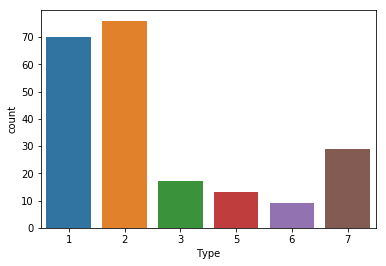

In [6]:
sns.countplot(data['Type'])
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Text(0.5, 1.0, 'General Statistics of the Dataset')

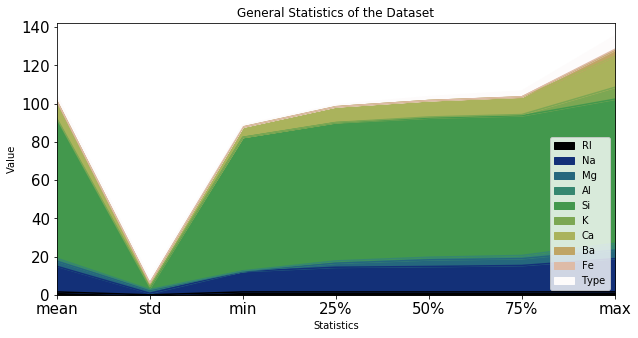

In [9]:
data.describe().drop("count",axis=0).plot(kind = "area",fontsize=15, figsize = (10,5), table = False,colormap="gist_earth")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of the Dataset")

# Explore Data

### Univariate Analysis

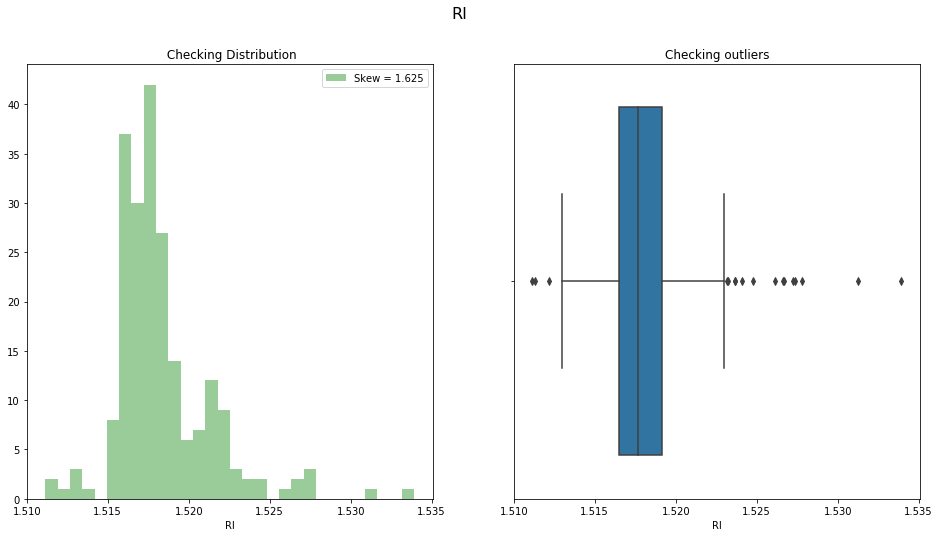

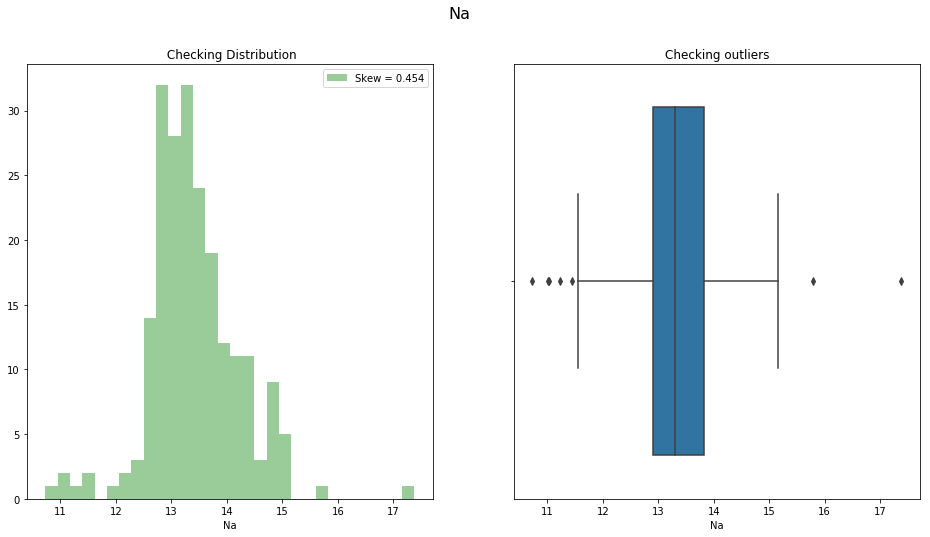

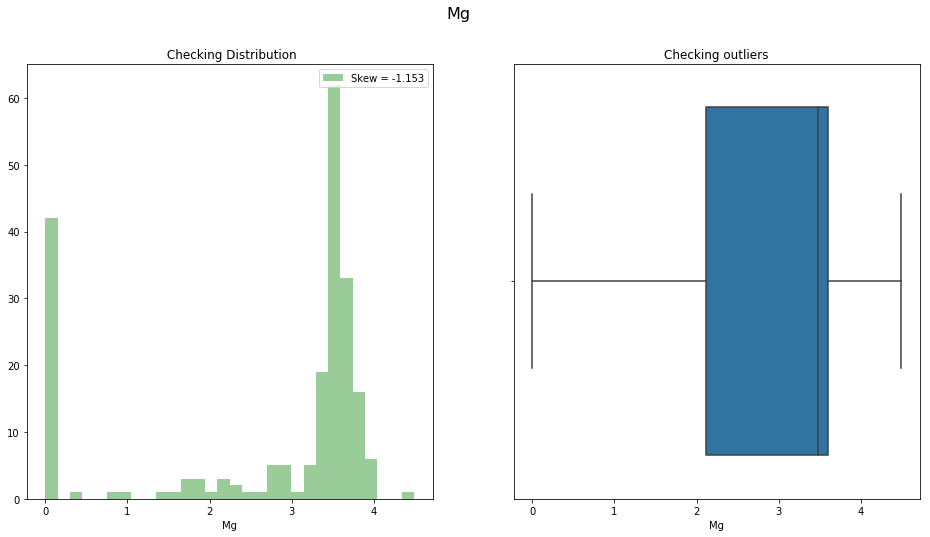

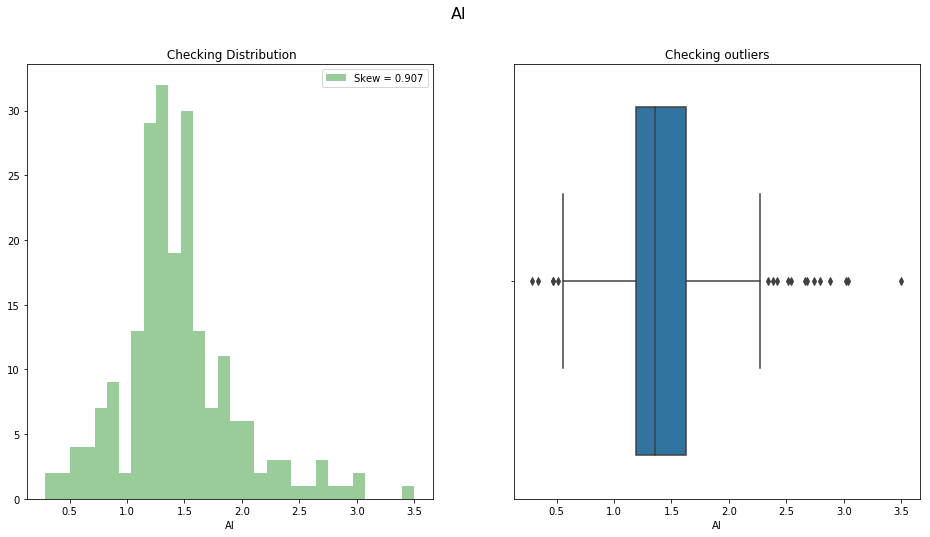

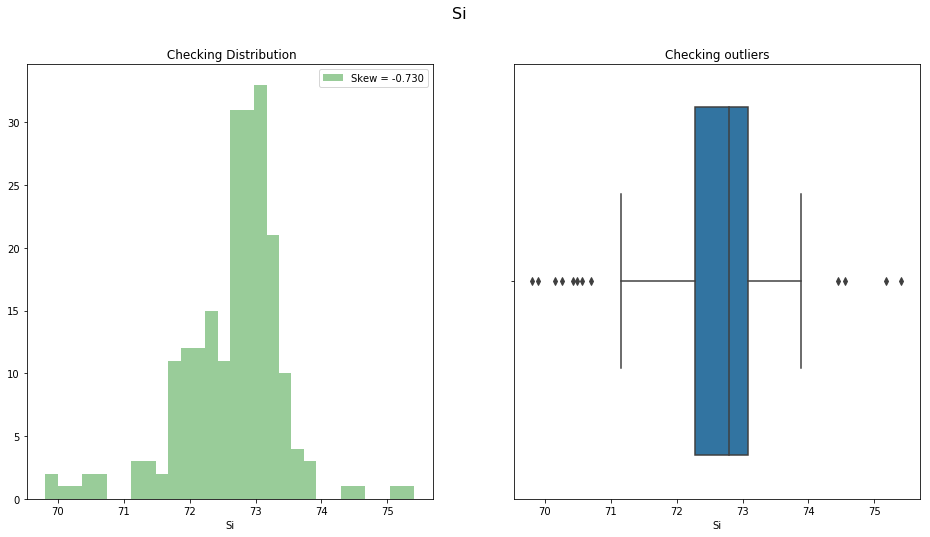

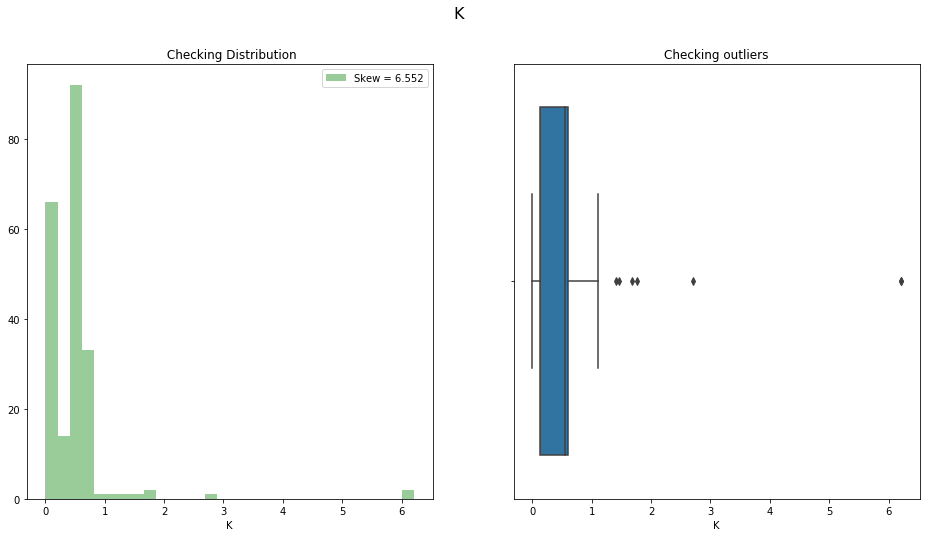

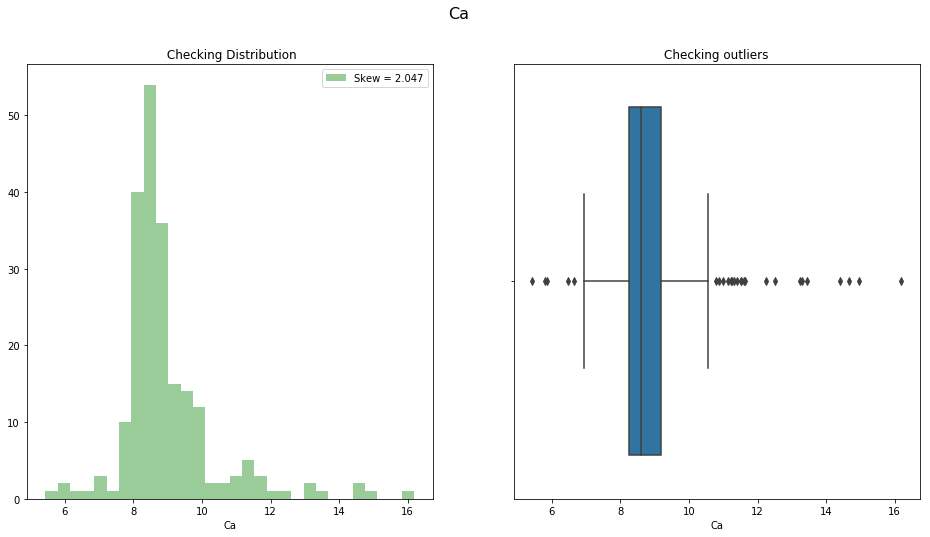

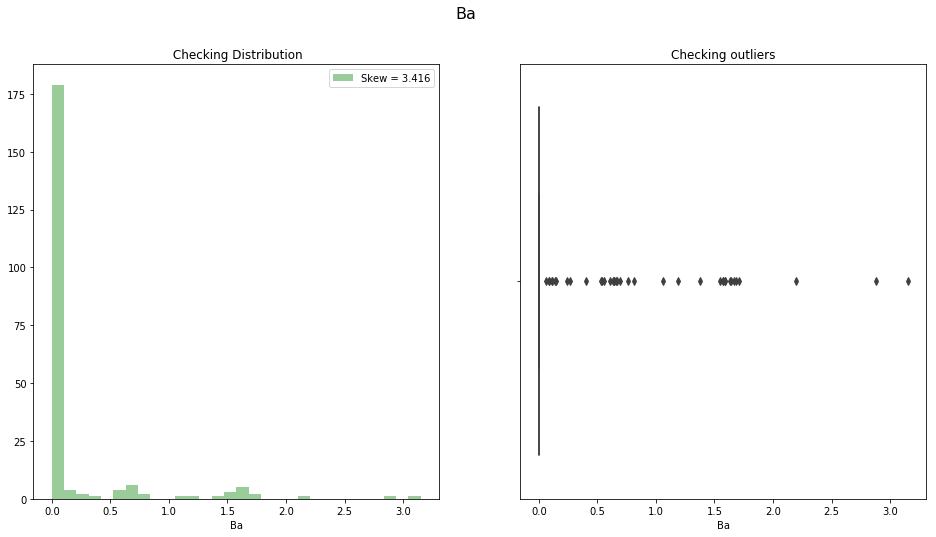

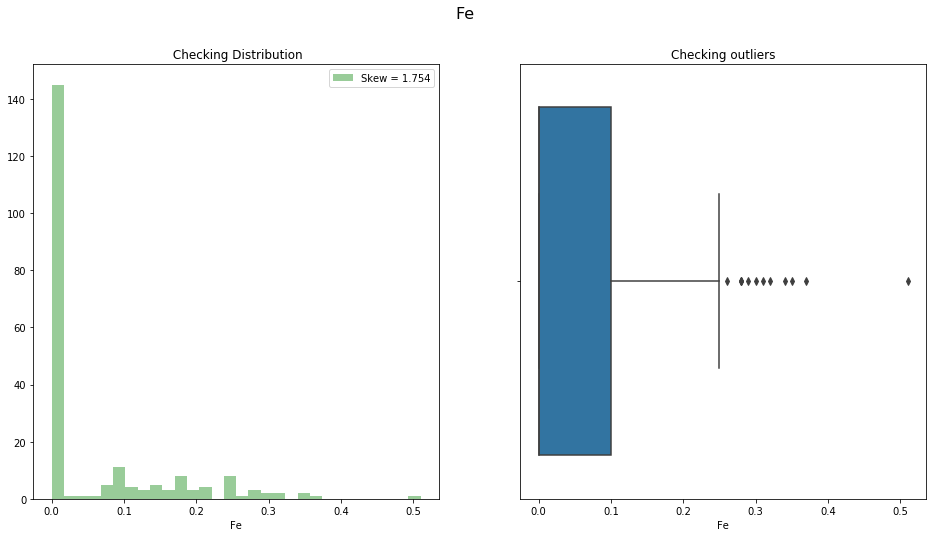

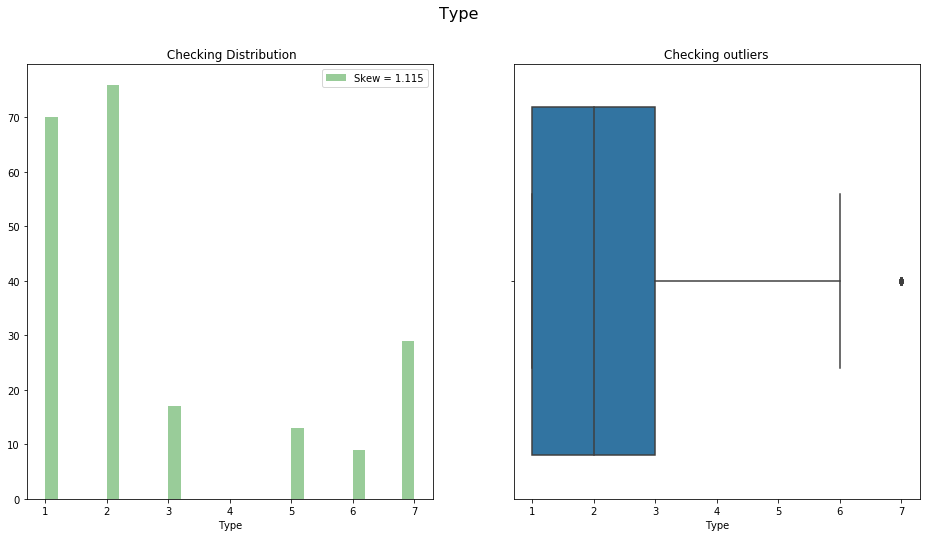

In [10]:
for col in data.columns:
    skew = data[col].skew()
    fig = plt.figure(figsize=(16,8));
    sns.distplot(data[col],kde=False,label='Skew = %.3f' %(skew), bins=30,color="green",ax = plt.subplot(121))
    plt.legend(loc='upper right')
    plt.title(" Checking Distribution")
    sns.boxplot(data[col],ax = plt.subplot(122))
    plt.title("Checking outliers")
    plt.suptitle(col, fontsize=16)
   
    plt.show()

#### Observations:
1)None of the features are normally distributed.
2)The features Fe, Ba, Ca and K has the highest skew coefficients.
3)Potassium (K) and Barium (Ba) seems to contain many outliers. 

<Figure size 576x576 with 0 Axes>

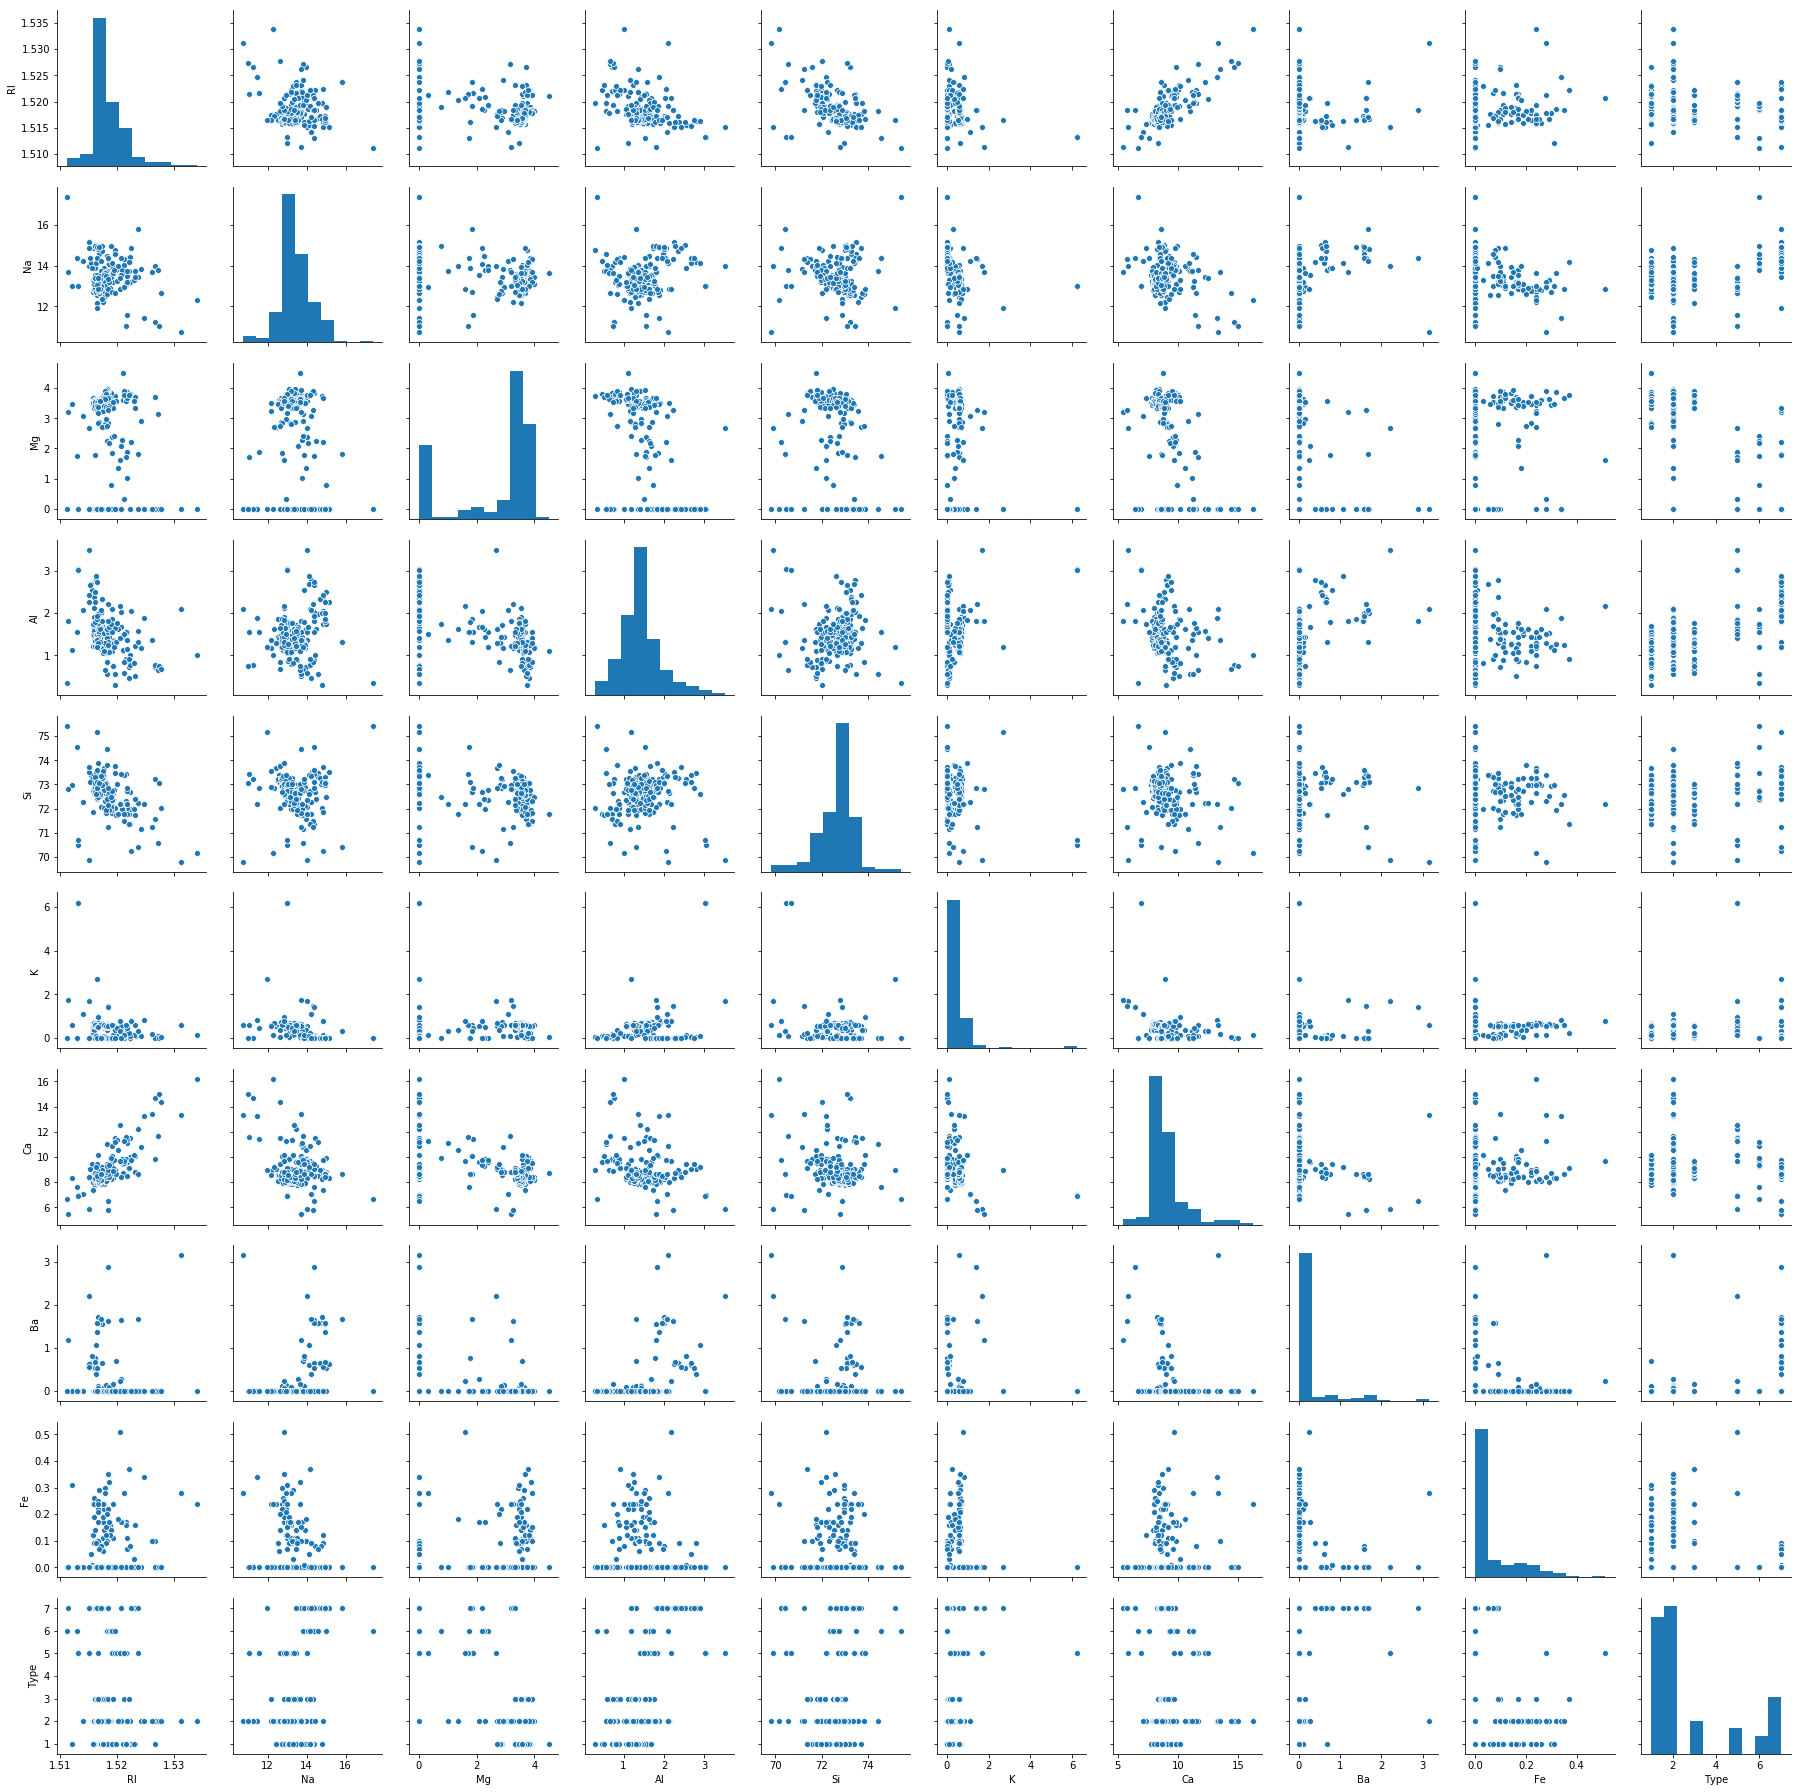

In [11]:
plt.figure(figsize=(8,8))
sns.pairplot(data,palette='Greens')
plt.show()

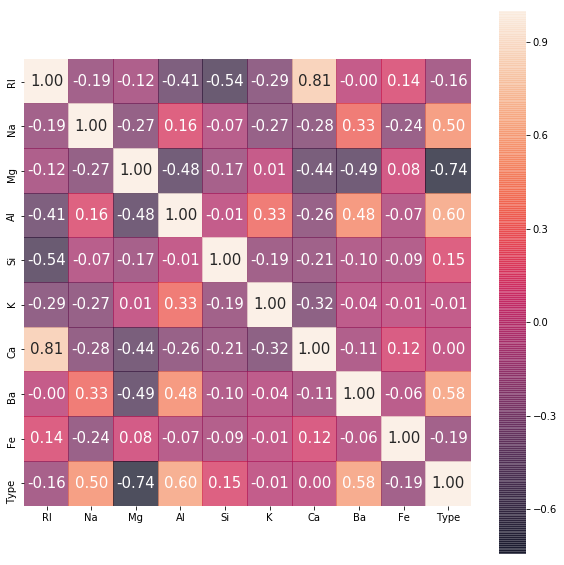

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},alpha = 0.7)
plt.show()

# Data Preparation

In [13]:
from scipy.stats import boxcox,skew # data transform

### Outlier removal (Data Cleaning)

In [14]:
for col in data.columns:
    stat = data[col].describe()
    #print(stat)
    IQR = stat['75%'] - stat['25%']
    step = 1.5 * IQR
    outlier_list_index = data[(data[col] <  stat['25%'] - step) | (data[col] > stat['75%'] + step )].index

data.drop(outlier_list_index,axis=0,inplace=True)
data.reset_index()
data.shape

(185, 10)

### Treating skewedness (Data Transformation)

In [15]:
transformed_data=pd.DataFrame()
for feat in data.columns:
    transformed_data[feat],_=boxcox(data[feat]+1)

In [16]:
transformed_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.003903,2.681761,99.263995,0.797188,9.963691e+21,0.056697,0.405513,0.0,0.0,0.472087
1,0.003903,2.698668,54.035057,0.933232,1.170222e+22,0.327756,0.405096,0.0,0.0,0.472087
2,0.003903,2.674230,52.039359,1.020473,1.222440e+22,0.283094,0.405069,0.0,0.0,0.472087
3,0.003903,2.651994,57.762164,0.897848,1.146820e+22,0.367436,0.405290,0.0,0.0,0.472087
4,0.003903,2.656201,54.848211,0.872033,1.241009e+22,0.359005,0.405219,0.0,0.0,0.472087


In [17]:
pd.DataFrame([skew(data),skew(transformed_data)],columns=data.columns,index=["original","transformed"])

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
original,1.673255,0.588086,-1.841908,1.106121,-0.709338,7.340573,2.144025,9.318759,1.553123,1.590255
transformed,0.000000,-0.000050,-1.019350,0.027770,0.130940,-0.196446,-0.221791,3.537571,0.752237,0.165850


# Model Evalutaion

In [18]:
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import 

In [19]:
transformed_data.pop("Type")
target=data["Type"]

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(transformed_data,target,test_size=0.2)

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline # streaming pipelines
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.metrics as accuracy_score

linear_models = []

lr=LogisticRegression()
lr_std=make_pipeline(StandardScaler(),LogisticRegression())
lr_std_pca=make_pipeline(StandardScaler(), PCA(), LogisticRegression())

linear_models.extend([lr, lr_std,lr_std_pca])

models={}
for model in linear_models:
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        
        print("\n\n Confusion Matrix \n")
        print(confusion_matrix(ypred, ytest))
        print("\n\n classification_report \n")
        print(classification_report(ypred, ytest))



 Confusion Matrix 

[[ 0  0  0  0  0]
 [15 13  5  3  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


 classification_report 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.35      0.52        37
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

   micro avg       0.35      0.35      0.35        37
   macro avg       0.20      0.07      0.10        37
weighted avg       1.00      0.35      0.52        37



 Confusion Matrix 

[[11  8  3  0  0]
 [ 4  4  2  0  0]
 [ 0  0  0  0  0]
 [ 0  1  0  3  0]
 [ 0  0  0  0  1]]


 classification_report 

              precision    recall  f1-score   support

           1       0.73      0.50      0.59        22
           2       0.31      0.40      0.35        10
           3       0.00      0.00      0.00         0
           5  

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = [{"max_depth":[11,12,13],"min_samples_leaf":[110,120,130],"max_features":[0.625,0.65,0.675],"n_estimators":[5]}]

Grid = GridSearchCV(rf, parameters,cv=5,n_jobs=-1)
Grid.fit(xtrain, ytrain)
#bestrf = Grid.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [11, 12, 13], 'min_samples_leaf': [110, 120, 130], 'max_features': [0.625, 0.65, 0.675], 'n_estimators': [5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
bestrf = Grid.best_estimator_
bestrf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features=0.625, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=120, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RI    0.000000
Na    0.048816
Mg    0.092446
Al    0.732918
Si    0.000000
K     0.000000
Ca    0.125820
Ba    0.000000
Fe    0.000000
dtype: float64


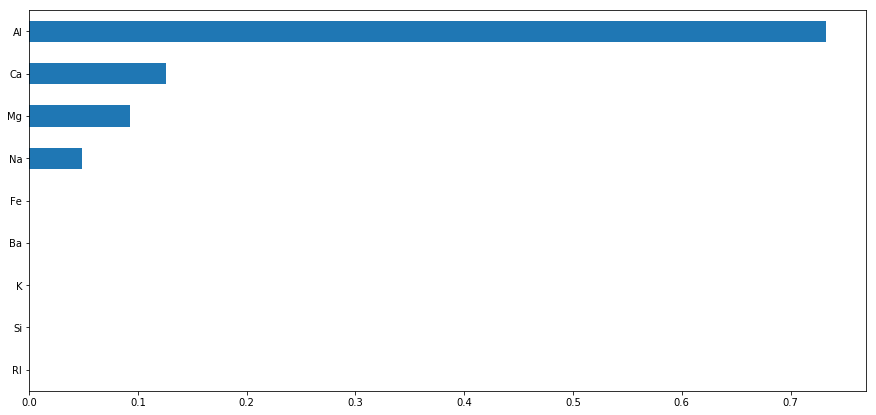

In [24]:
rf = RandomForestClassifier(max_depth=11,
           max_features=0.65,min_samples_leaf=25,n_estimators=5, n_jobs=-1,random_state=1)#estimator value decresed for faster computation 
 
rf.fit(xtrain,ytrain)

feature_importances = pd.Series(rf.feature_importances_, index=xtrain.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(15,7))

In [25]:
ypred=rf.predict(xtest)
print("\n\n Confusion Matrix \n")
print(confusion_matrix(ypred, ytest))
print("\n\n classification_report \n")
print(classification_report(ypred, ytest))




 Confusion Matrix 

[[14  9  5  0  0]
 [ 1  4  0  3  1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


 classification_report 

              precision    recall  f1-score   support

           1       0.93      0.50      0.65        28
           2       0.31      0.44      0.36         9
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

   micro avg       0.49      0.49      0.49        37
   macro avg       0.25      0.19      0.20        37
weighted avg       0.78      0.49      0.58        37

